In [59]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Configuración global para gráficos
plt.style.use("ggplot")

# Ruta del archivo principal
file_path = "../data/Internet.xlsx"


Primeras filas de la hoja 'Acc_vel_loc_sinrangos':
        Partido   Localidad  link Indec Velocidad (Mbps)  Provincia  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo          6854100       3.50    145.0

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partido           18864 non-null  object 
 1   Localidad         18864 non-null  object 
 2   link Indec        18863 non-null  object 
 3   Velocidad (Mbps)  18864 non-null  object 
 4   Provincia         18864 non-null  float64
 5   Accesos    

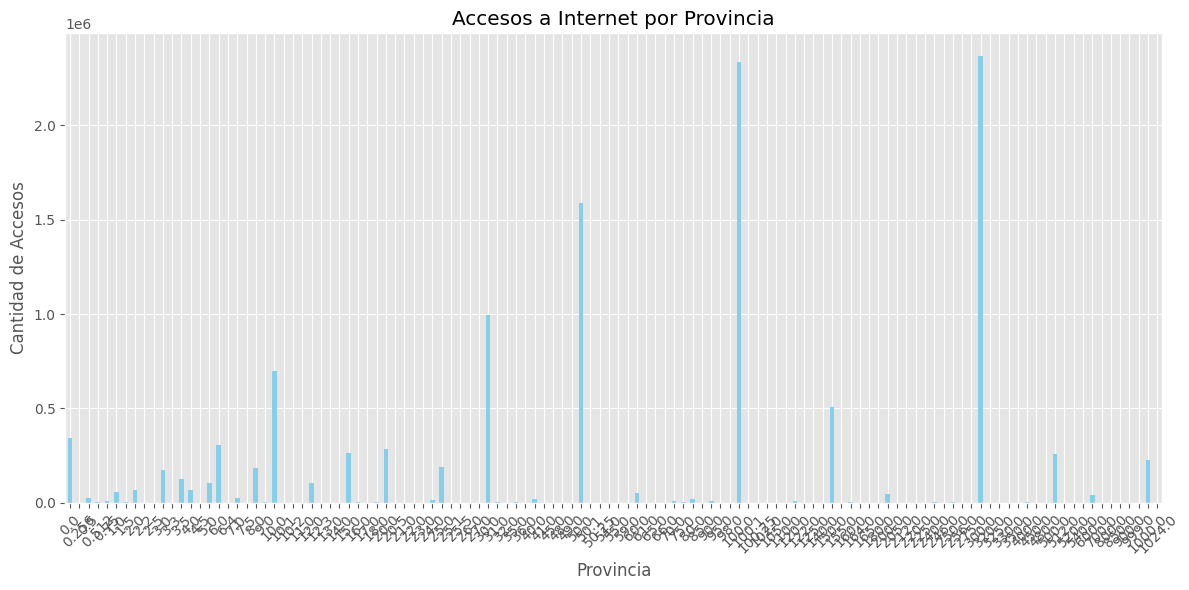

Datos limpios guardados en '../data/Internet_cleaned.xlsx'


In [60]:
# Cargar la hoja "Acc_vel_loc_sinrangos"
df = pd.read_excel(file_path, sheet_name="Acc_vel_loc_sinrangos")

# Mostrar las primeras filas
print("Primeras filas de la hoja 'Acc_vel_loc_sinrangos':")
print(df.head())

# Información general
print("\nInformación general del dataset:")
df.info()

# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar valores nulos en columnas clave
df_cleaned = df.dropna(subset=["Velocidad (Mbps)", "Provincia"]).copy()

# Convertir "Velocidad (Mbps)" a números
df_cleaned["Velocidad (Mbps)"] = pd.to_numeric(df_cleaned["Velocidad (Mbps)"], errors="coerce").fillna(0)

# Agrupar por provincia y sumar accesos
accesos_por_provincia = df_cleaned.groupby("Provincia")["Accesos"].sum()

# Visualizar los accesos por provincia
plt.figure(figsize=(12, 6))
accesos_por_provincia.plot(kind="bar", color="skyblue")
plt.title("Accesos a Internet por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar datos limpios
df_cleaned.to_excel("../data/Internet_cleaned.xlsx", index=False)
print("Datos limpios guardados en '../data/Internet_cleaned.xlsx'")


Primeras filas de la hoja 'Velocidad_sin_Rangos':
    Año  Trimestre     Provincia  Velocidad  Accesos
0  2024          2  BUENOS AIRES       75.0     1062
1  2024          2  BUENOS AIRES       59.0       59
2  2024          2  BUENOS AIRES      480.0        5
3  2024          2  BUENOS AIRES        3.5    41735
4  2024          2  BUENOS AIRES       18.0     1042

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18884 entries, 0 to 18883
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        18884 non-null  int64  
 1   Trimestre  18884 non-null  int64  
 2   Provincia  18884 non-null  object 
 3   Velocidad  18874 non-null  float64
 4   Accesos    18884 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 737.8+ KB

Valores nulos por columna:
Año           0
Trimestre     0
Provincia     0
Velocidad    10
Accesos       0
dtype: int64


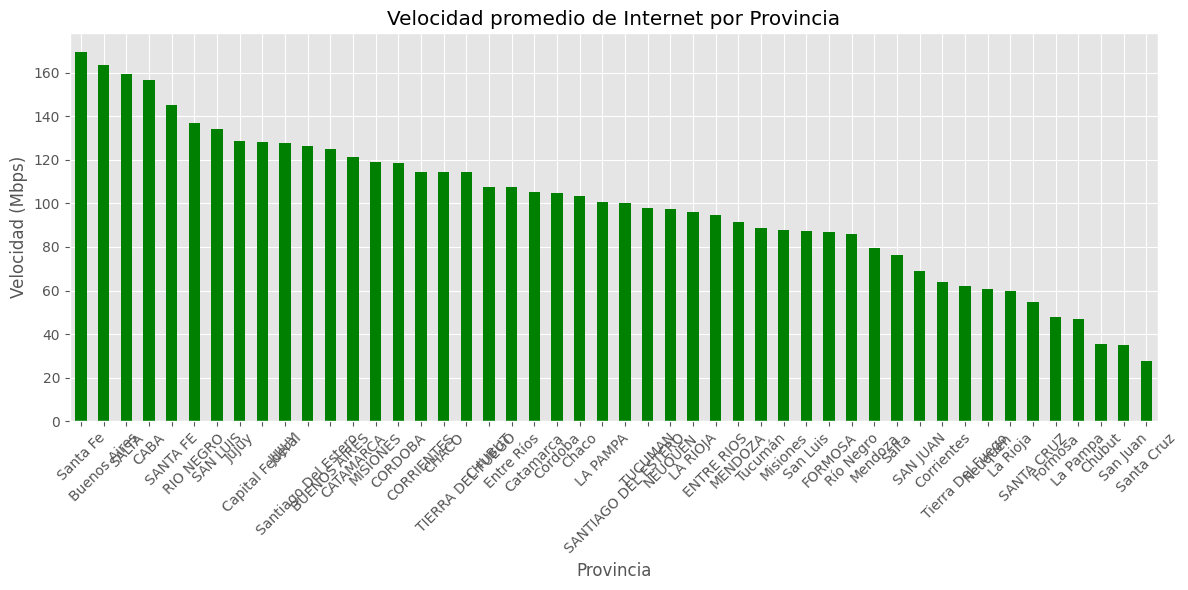

Datos limpios guardados en '../data/Velocidad_sin_Rangos_cleaned.xlsx'


In [61]:
# Cargar la hoja "Velocidad_sin_Rangos"
df_velocidad = pd.read_excel(file_path, sheet_name="Velocidad_sin_Rangos")

# Mostrar información básica
print("Primeras filas de la hoja 'Velocidad_sin_Rangos':")
print(df_velocidad.head())

# Información general
print("\nInformación general:")
df_velocidad.info()

# Valores nulos
print("\nValores nulos por columna:")
print(df_velocidad.isnull().sum())

# Eliminar valores nulos
df_velocidad_cleaned = df_velocidad.dropna(subset=["Velocidad", "Accesos"]).copy()

# Promedio de velocidad por provincia
velocidad_promedio = df_velocidad_cleaned.groupby("Provincia")["Velocidad"].mean()

# Gráfico de velocidades
plt.figure(figsize=(12, 6))
velocidad_promedio.sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Velocidad promedio de Internet por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Velocidad (Mbps)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar datos limpios
df_velocidad_cleaned.to_excel("../data/Velocidad_sin_Rangos_cleaned.xlsx", index=False)
print("Datos limpios guardados en '../data/Velocidad_sin_Rangos_cleaned.xlsx'")


Primeras filas de la hoja 'Penetracion-hogares':
    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


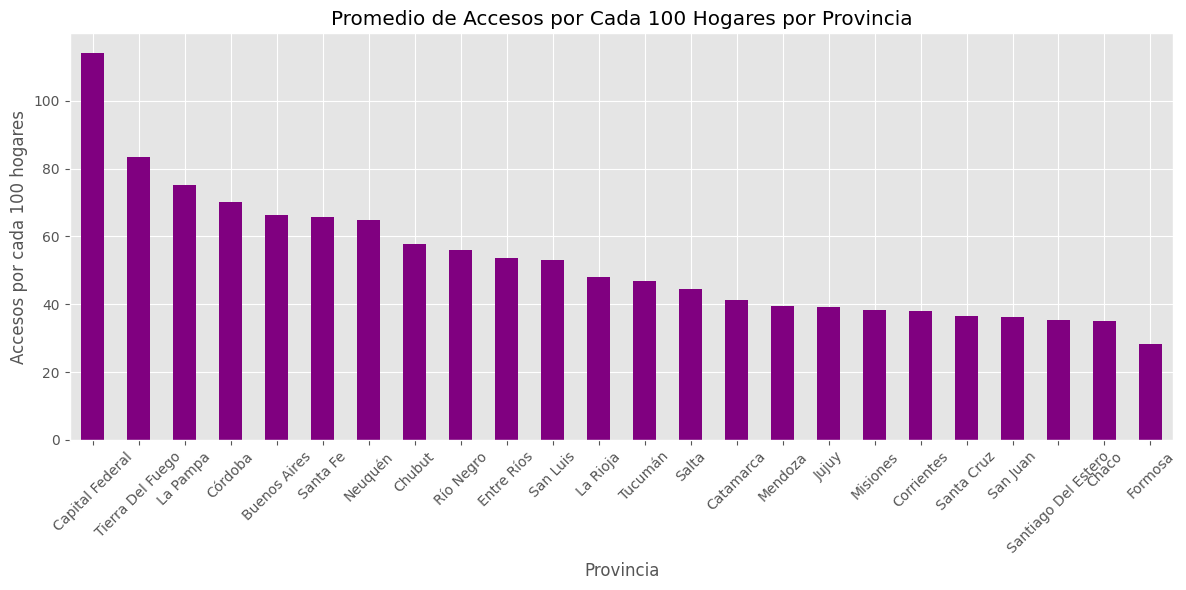

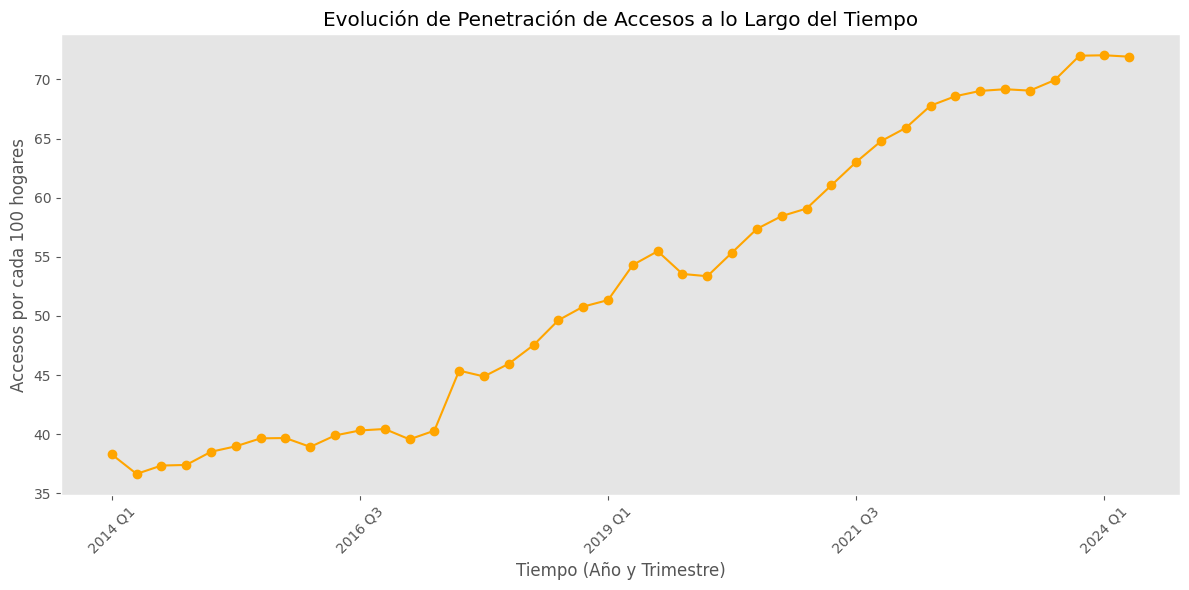

Datos limpios guardados en '../data/Penetracion_hogares_cleaned.xlsx'


In [62]:
# Cargar la hoja "Penetracion-hogares"
df_penetracion = pd.read_excel(file_path, sheet_name="Penetracion-hogares")

# Mostrar información básica
print("Primeras filas de la hoja 'Penetracion-hogares':")
print(df_penetracion.head())

# Información general
print("\nInformación general:")
df_penetracion.info()

# Evolución de accesos
df_penetracion["Tiempo"] = df_penetracion["Año"].astype(str) + " Q" + df_penetracion["Trimestre"].astype(str)

# Promedio de accesos por cada 100 hogares
penetracion_promedio = df_penetracion.groupby("Provincia")["Accesos por cada 100 hogares"].mean()

# Gráfico de promedio por provincia
plt.figure(figsize=(12, 6))
penetracion_promedio.sort_values(ascending=False).plot(kind="bar", color="purple")
plt.title("Promedio de Accesos por Cada 100 Hogares por Provincia")
plt.xlabel("Provincia")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evolución temporal
evolucion_penetracion = df_penetracion.groupby("Tiempo")["Accesos por cada 100 hogares"].mean()

plt.figure(figsize=(12, 6))
evolucion_penetracion.plot(kind="line", marker="o", color="orange")
plt.title("Evolución de Penetración de Accesos a lo Largo del Tiempo")
plt.xlabel("Tiempo (Año y Trimestre)")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Guardar datos limpios
df_penetracion.to_excel("../data/Penetracion_hogares_cleaned.xlsx", index=False)
print("Datos limpios guardados en '../data/Penetracion_hogares_cleaned.xlsx'")
